# MACHINE LEARNING

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [10]:
temp = pd.read_csv('../data/raw/city_temperature.csv')
temp

c:\Users\vsuar\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9
...,...,...,...,...,...,...,...,...
2906322,North America,US,Additional Territories,San Juan Puerto Rico,7,27,2013,82.4
2906323,North America,US,Additional Territories,San Juan Puerto Rico,7,28,2013,81.6
2906324,North America,US,Additional Territories,San Juan Puerto Rico,7,29,2013,84.2
2906325,North America,US,Additional Territories,San Juan Puerto Rico,7,30,2013,83.8


In [11]:
temp[temp['Country'] == 'Italy']['City'].unique()

array(['Milan', 'Rome'], dtype=object)

In [12]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906327 entries, 0 to 2906326
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Region          object 
 1   Country         object 
 2   State           object 
 3   City            object 
 4   Month           int64  
 5   Day             int64  
 6   Year            int64  
 7   AvgTemperature  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 177.4+ MB


In [13]:
temp.describe()

,Month,Day,Year,AvgTemperature
count,2.906327e+06,2.906327e+06,2.906327e+06,2.906327e+06
mean,6.469163e+00,1.571682e+01,2.006624e+03,5.600492e+01
std,3.456489e+00,8.800534e+00,2.338226e+01,3.212359e+01
min,1.000000e+00,0.000000e+00,2.000000e+02,-9.900000e+01
25%,3.000000e+00,8.000000e+00,2.001000e+03,4.580000e+01
50%,6.000000e+00,1.600000e+01,2.007000e+03,6.250000e+01
75%,9.000000e+00,2.300000e+01,2.013000e+03,7.550000e+01
max,1.200000e+01,3.100000e+01,2.020000e+03,1.100000e+02


In [14]:
temp = temp.drop_duplicates()

In [15]:
temp.isna().sum()

Region                  0
Country                 0
State             1448805
City                    0
Month                   0
Day                     0
Year                    0
AvgTemperature          0
dtype: int64

In [16]:
temp = temp.fillna('Not Specified')

In [16]:
temp

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,Not Specified,Algiers,1,1,1995,64.2
1,Africa,Algeria,Not Specified,Algiers,1,2,1995,49.4
2,Africa,Algeria,Not Specified,Algiers,1,3,1995,48.8
3,Africa,Algeria,Not Specified,Algiers,1,4,1995,46.4
4,Africa,Algeria,Not Specified,Algiers,1,5,1995,47.9
...,...,...,...,...,...,...,...,...
2906322,North America,US,Additional Territories,San Juan Puerto Rico,7,27,2013,82.4
2906323,North America,US,Additional Territories,San Juan Puerto Rico,7,28,2013,81.6
2906324,North America,US,Additional Territories,San Juan Puerto Rico,7,29,2013,84.2
2906325,North America,US,Additional Territories,San Juan Puerto Rico,7,30,2013,83.8


In [17]:
temp.isna().sum()

Region            0
Country           0
State             0
City              0
Month             0
Day               0
Year              0
AvgTemperature    0
dtype: int64

In [18]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2885612 entries, 0 to 2906326
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Region          object 
 1   Country         object 
 2   State           object 
 3   City            object 
 4   Month           int64  
 5   Day             int64  
 6   Year            int64  
 7   AvgTemperature  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 198.1+ MB


In [19]:
temp.columns

Index(['Region', 'Country', 'State', 'City', 'Month', 'Day', 'Year',
       'AvgTemperature'],
      dtype='object')

In [20]:
temp=temp[ (temp['Year'] != 200) & (temp['Year'] != 201) & (temp['Day'] != 0) ]

In [21]:
temp.loc[:, "AvgTemperature"] = (temp["AvgTemperature"] - 32) * (5/9)
temp

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,Not Specified,Algiers,1,1,1995,17.888889
1,Africa,Algeria,Not Specified,Algiers,1,2,1995,9.666667
2,Africa,Algeria,Not Specified,Algiers,1,3,1995,9.333333
3,Africa,Algeria,Not Specified,Algiers,1,4,1995,8.000000
4,Africa,Algeria,Not Specified,Algiers,1,5,1995,8.833333
...,...,...,...,...,...,...,...,...
2906322,North America,US,Additional Territories,San Juan Puerto Rico,7,27,2013,28.000000
2906323,North America,US,Additional Territories,San Juan Puerto Rico,7,28,2013,27.555556
2906324,North America,US,Additional Territories,San Juan Puerto Rico,7,29,2013,29.000000
2906325,North America,US,Additional Territories,San Juan Puerto Rico,7,30,2013,28.777778


In [22]:
temp['Date'] = pd.to_datetime(temp[['Year','Month','Day']])
temp

,Region,Country,State,City,Month,Day,Year,AvgTemperature,Date
0,Africa,Algeria,Not Specified,Algiers,1,1,1995,17.888889,1995-01-01
1,Africa,Algeria,Not Specified,Algiers,1,2,1995,9.666667,1995-01-02
2,Africa,Algeria,Not Specified,Algiers,1,3,1995,9.333333,1995-01-03
3,Africa,Algeria,Not Specified,Algiers,1,4,1995,8.000000,1995-01-04
4,Africa,Algeria,Not Specified,Algiers,1,5,1995,8.833333,1995-01-05
...,...,...,...,...,...,...,...,...,...
2906322,North America,US,Additional Territories,San Juan Puerto Rico,7,27,2013,28.000000,2013-07-27
2906323,North America,US,Additional Territories,San Juan Puerto Rico,7,28,2013,27.555556,2013-07-28
2906324,North America,US,Additional Territories,San Juan Puerto Rico,7,29,2013,29.000000,2013-07-29
2906325,North America,US,Additional Territories,San Juan Puerto Rico,7,30,2013,28.777778,2013-07-30


In [23]:
temp =temp[(temp['AvgTemperature'] >= -50) & (temp['Year'] < 2020)]
temp

,Region,Country,State,City,Month,Day,Year,AvgTemperature,Date
0,Africa,Algeria,Not Specified,Algiers,1,1,1995,17.888889,1995-01-01
1,Africa,Algeria,Not Specified,Algiers,1,2,1995,9.666667,1995-01-02
2,Africa,Algeria,Not Specified,Algiers,1,3,1995,9.333333,1995-01-03
3,Africa,Algeria,Not Specified,Algiers,1,4,1995,8.000000,1995-01-04
4,Africa,Algeria,Not Specified,Algiers,1,5,1995,8.833333,1995-01-05
...,...,...,...,...,...,...,...,...,...
2906322,North America,US,Additional Territories,San Juan Puerto Rico,7,27,2013,28.000000,2013-07-27
2906323,North America,US,Additional Territories,San Juan Puerto Rico,7,28,2013,27.555556,2013-07-28
2906324,North America,US,Additional Territories,San Juan Puerto Rico,7,29,2013,29.000000,2013-07-29
2906325,North America,US,Additional Territories,San Juan Puerto Rico,7,30,2013,28.777778,2013-07-30


<Figure size 4000x2000 with 0 Axes>

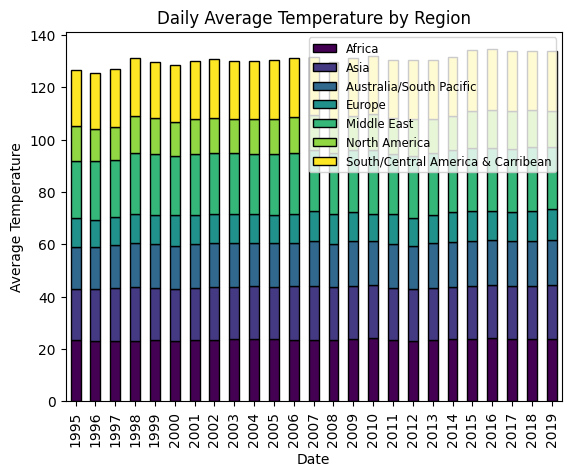

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que tienes el DataFrame 'df' con las columnas 'Region', 'Year' y 'AvgTemperature'

# Agrupar los datos por Región y Año para calcular la media de temperaturas por región y año
region = temp.groupby(['Region', 'Year'])['AvgTemperature'].mean().reset_index()

# Crear un DataFrame con las medias de temperaturas por año para cada región
pivot_region = region.pivot(index='Year', columns='Region', values='AvgTemperature')

# Configurar el tamaño del gráfico
plt.figure(figsize=(40, 20))

# Crear el gráfico de barras apiladas
pivot_region.plot(kind='bar', stacked=True, colormap='viridis', edgecolor='black')

# Configurar el título y etiquetas de los ejes
plt.title("Daily Average Temperature by Region")
plt.xlabel("Date")
plt.ylabel("Average Temperature")
plt.legend(fontsize='small')
# Mostrar el gráfico
plt.show()


In [25]:
temp.drop(['Region', 'State', 'Country', 'Day', 'Date'], axis=1, inplace=True)
temp

c:\Users\vsuar\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,City,Month,Year,AvgTemperature
0,Algiers,1,1995,17.888889
1,Algiers,1,1995,9.666667
2,Algiers,1,1995,9.333333
3,Algiers,1,1995,8.000000
4,Algiers,1,1995,8.833333
...,...,...,...,...
2906322,San Juan Puerto Rico,7,2013,28.000000
2906323,San Juan Puerto Rico,7,2013,27.555556
2906324,San Juan Puerto Rico,7,2013,29.000000
2906325,San Juan Puerto Rico,7,2013,28.777778


In [26]:
le = LabelEncoder()
temp["City"] = le.fit_transform(temp["City"])
temp

c:\Users\vsuar\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,City,Month,Year,AvgTemperature
0,7,1,1995,17.888889
1,7,1,1995,9.666667
2,7,1,1995,9.333333
3,7,1,1995,8.000000
4,7,1,1995,8.833333
...,...,...,...,...
2906322,261,7,2013,28.000000
2906323,261,7,2013,27.555556
2906324,261,7,2013,29.000000
2906325,261,7,2013,28.777778


In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
import pickle
import yaml

In [28]:
train, test = train_test_split(temp)

In [29]:
train.to_csv('../data/train.csv')

In [30]:
test.to_csv('../data/test.csv')

In [31]:
X = train.drop(["AvgTemperature"], axis=1)
y = train["AvgTemperature"]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=21)

DECISION TREE REGRESSOR

In [33]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
r2_score(y_test, y_pred)

0.8826258932737177

In [34]:
with open('../models/modelo_tree.pkl', 'wb') as modtree:
    pickle.dump(tree, modtree)

In [35]:
with open("../models/model_tree.yaml", "w") as a:
    yaml.dump(tree, a)

RANDOM FOREST REGRESSOR

In [ ]:
# rf = RandomForestRegressor()
# rf.fit(X_train, y_train)
# r2_score(y_test, rf.predict(X_test))

In [36]:
with open('../models/modelo_tree.pkl', 'rb') as archivo_entrada:
    modelo_entrenado = pickle.load(archivo_entrada)

**EVALUACIÓN**

In [37]:
temp_test = pd.read_csv('../data/test.csv', index_col=0)
temp_test

,City,Month,Year,AvgTemperature
1155369,197,1,2005,-3.500000
1728474,188,7,2016,28.166667
2149478,279,11,2011,14.944444
1809347,141,9,2009,27.777778
2309878,250,10,2019,12.444444
...,...,...,...,...
1125034,100,6,2006,34.500000
2362422,39,6,2011,11.944444
1470808,194,7,1998,26.500000
1559832,170,7,2017,30.111111


In [38]:
X_val = temp_test.drop(columns=['AvgTemperature'])
X_val

,City,Month,Year
1155369,197,1,2005
1728474,188,7,2016
2149478,279,11,2011
1809347,141,9,2009
2309878,250,10,2019
...,...,...,...
1125034,100,6,2006
2362422,39,6,2011
1470808,194,7,1998
1559832,170,7,2017


In [39]:
y_val = temp_test['AvgTemperature']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_val, y_val, test_size=0.20, random_state=21)

In [41]:
predicciones = modelo_entrenado.predict(X_test)
modelo_entrenado.score(X_test, y_test)

0.8821871506291733